In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [3]:
# APPLICATION_TYPE
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
replace_application = list(app_type_counts[app_type_counts < 300].index)
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
print(application_df.APPLICATION_TYPE.value_counts())

# CLASSIFICATION
classification_counts = application_df.CLASSIFICATION.value_counts()
replace_class = list(classification_counts[classification_counts < 1000].index)
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
print(application_df.CLASSIFICATION.value_counts())

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64


In [4]:
# Drop the non-beneficial ID columns
application_df.drop(columns=['EIN','NAME','ASK_AMT'],inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [5]:
# One Hot Encoding
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
encode_df.columns = enc.get_feature_names(application_cat)
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
# Split Train & Test Dataset
X = application_df.drop(columns = 'IS_SUCCESSFUL').values
y = application_df['IS_SUCCESSFUL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Define the Neural Network model
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()

# Create checkpoints and Compile
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=4020
)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500,callbacks=[cp_callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3440      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 6,511
Trainable params: 6,511
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
804/804 [==============================] - 3s 2ms/step - loss: 0.5790 - accuracy: 0.7112
Epoch 2/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5549 - accuracy: 0.7280
Epoch 3/500
804/804 [=============================

804/804 [==============================] - 3s 4ms/step - loss: 0.5371 - accuracy: 0.7385
Epoch 58/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5369 - accuracy: 0.7367
Epoch 59/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5369 - accuracy: 0.7382
Epoch 60/500
791/804 [============================>.] - ETA: 0s - loss: 0.5367 - accuracy: 0.7385
Epoch 00060: saving model to checkpoints\weights.60.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5367 - accuracy: 0.7383
Epoch 61/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5364 - accuracy: 0.7381
Epoch 62/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5367 - accuracy: 0.7382
Epoch 63/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5363 - accuracy: 0.7393
Epoch 64/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5365 - accuracy: 0.7389
Epoch 65/500
800/804 [============================>.] -

791/804 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7403
Epoch 00120: saving model to checkpoints\weights.120.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5335 - accuracy: 0.7404
Epoch 121/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5337 - accuracy: 0.7398
Epoch 122/500
804/804 [==============================] - 3s 3ms/step - loss: 0.5336 - accuracy: 0.7402
Epoch 123/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5334 - accuracy: 0.7394
Epoch 124/500
804/804 [==============================] - 4s 5ms/step - loss: 0.5337 - accuracy: 0.7405
Epoch 125/500
804/804 [==============================] - ETA: 0s - loss: 0.5340 - accuracy: 0.7400
Epoch 00125: saving model to checkpoints\weights.125.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5340 - accuracy: 0.7400
Epoch 126/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5336 - accuracy: 0.7404
Epoch 1

804/804 [==============================] - 3s 4ms/step - loss: 0.5325 - accuracy: 0.7401
Epoch 182/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5331 - accuracy: 0.7400
Epoch 183/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5334 - accuracy: 0.7397
Epoch 184/500
804/804 [==============================] - 3s 3ms/step - loss: 0.5327 - accuracy: 0.7411
Epoch 185/500
795/804 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.7412
Epoch 00185: saving model to checkpoints\weights.185.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5328 - accuracy: 0.7407
Epoch 186/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5331 - accuracy: 0.7399
Epoch 187/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5327 - accuracy: 0.7403
Epoch 188/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5329 - accuracy: 0.7393
Epoch 189/500
804/804 [========================

804/804 [==============================] - 3s 4ms/step - loss: 0.5331 - accuracy: 0.7405
Epoch 245/500
801/804 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7407
Epoch 00245: saving model to checkpoints\weights.245.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5324 - accuracy: 0.7406
Epoch 246/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5327 - accuracy: 0.7405
Epoch 247/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5333 - accuracy: 0.7409
Epoch 248/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5328 - accuracy: 0.7404
Epoch 249/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5327 - accuracy: 0.7408
Epoch 250/500
798/804 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7385
Epoch 00250: saving model to checkpoints\weights.250.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5336 - accuracy: 0.7387
Epoch 2

Epoch 306/500
804/804 [==============================] - 3s 3ms/step - loss: 0.5327 - accuracy: 0.7408
Epoch 307/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5329 - accuracy: 0.7402
Epoch 308/500
804/804 [==============================] - 3s 3ms/step - loss: 0.5320 - accuracy: 0.7408
Epoch 309/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5329 - accuracy: 0.7407
Epoch 310/500
789/804 [============================>.] - ETA: 0s - loss: 0.5328 - accuracy: 0.7397 ETA: 0s - loss: 0.532
Epoch 00310: saving model to checkpoints\weights.310.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5333 - accuracy: 0.7396
Epoch 311/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5336 - accuracy: 0.7395
Epoch 312/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5328 - accuracy: 0.7397
Epoch 313/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5328 - accuracy: 0.7393
Epoch 314/5

804/804 [==============================] - 3s 4ms/step - loss: 0.5340 - accuracy: 0.7402
Epoch 369/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5339 - accuracy: 0.7395
Epoch 370/500
793/804 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7403
Epoch 00370: saving model to checkpoints\weights.370.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 0.5332 - accuracy: 0.7405
Epoch 371/500
804/804 [==============================] - 4s 4ms/step - loss: 0.5332 - accuracy: 0.7404
Epoch 372/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5327 - accuracy: 0.7409
Epoch 373/500
804/804 [==============================] - 3s 3ms/step - loss: 0.5335 - accuracy: 0.7407
Epoch 374/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5340 - accuracy: 0.7404
Epoch 375/500
779/804 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.7409
Epoch 00375: saving model to checkpoints\weights.37

803/804 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7398
Epoch 00430: saving model to checkpoints\weights.430.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5335 - accuracy: 0.7399
Epoch 431/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5335 - accuracy: 0.7410
Epoch 432/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5331 - accuracy: 0.7409
Epoch 433/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5329 - accuracy: 0.7407
Epoch 434/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5351 - accuracy: 0.7394
Epoch 435/500
798/804 [============================>.] - ETA: 0s - loss: 0.5341 - accuracy: 0.7405
Epoch 00435: saving model to checkpoints\weights.435.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5342 - accuracy: 0.7404
Epoch 436/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5340 - accuracy: 0.7403
Epoch 4

804/804 [==============================] - 3s 4ms/step - loss: 0.5337 - accuracy: 0.7403
Epoch 492/500
804/804 [==============================] - 3s 3ms/step - loss: 0.5340 - accuracy: 0.7402
Epoch 493/500
804/804 [==============================] - 3s 3ms/step - loss: 0.5333 - accuracy: 0.7403
Epoch 494/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5330 - accuracy: 0.7402
Epoch 495/500
798/804 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7400
Epoch 00495: saving model to checkpoints\weights.495.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5333 - accuracy: 0.7402
Epoch 496/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5339 - accuracy: 0.7402
Epoch 497/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5348 - accuracy: 0.7399
Epoch 498/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5357 - accuracy: 0.7399
Epoch 499/500
804/804 [========================

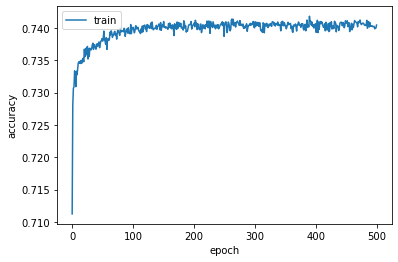

268/268 - 1s - loss: 0.5603 - accuracy: 0.7294
Loss: 0.5603253245353699, Accuracy: 0.7294460535049438


In [9]:
# Plot history of accuracy
plt.plot(fit_model.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [10]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")